Description : I chose the "HousePrices" dataset to analyze housing market trends in Windsor, Canada, during July, August, and September 1987. This dataset provides valuable insights into the factors influencing house prices, such as lot size, number of bedrooms and bathrooms, presence of amenities like driveways and recreational rooms, and location preferences. By examining this data, I aim to understand the dynamics of the real estate market during that period and identify key factors driving housing prices in the area.






To begin the data analysis process, we import the necessary libraries and dataset.

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

We load the data and verify its correct importation to ensure accuracy.

In [4]:
import pandas as pd
rawdata = pd.read_csv("/content/HousePrices.csv")
rawdata_data = pd.DataFrame(rawdata)
rawdata_data.head()

,rownames,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [5]:
rawdata_data.tail(10)

,rownames,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
536,537,82500,6000,3,2,4,yes,no,no,no,yes,0,no
537,538,83000,4800,3,1,3,yes,no,no,no,yes,0,no
538,539,84000,6500,3,2,3,yes,no,no,no,yes,0,no
539,540,85000,7320,4,2,2,yes,no,no,no,no,0,no
540,541,85000,6525,3,2,4,yes,no,no,no,no,1,no
541,542,91500,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3,2,2,yes,yes,no,no,yes,1,no
545,546,105000,6000,3,1,2,yes,no,no,no,yes,1,no


I have examined the ten rows of the dataset

In [6]:
rawdata_data.shape

(546, 13)

The dataset contains 546 observations and 13 variables.

In [7]:
# We need to examinie the data types of the variables.
rawdata_data.dtypes

rownames       int64
price          int64
lotsize        int64
bedrooms       int64
bathrooms      int64
stories        int64
driveway      object
recreation    object
fullbase      object
gasheat       object
aircon        object
garage         int64
prefer        object
dtype: object

I have identified six variables in the dataset as objects, which I have classified as categorical, while the rest are integers.

In [15]:
# We need to convert objects in to category
rawdata_data["prefers"] = rawdata_data ["prefer"].astype("category")
rawdata_data["aircons"] = rawdata_data["aircon"].astype("category")
rawdata_data["gasheats"] = rawdata_data ["gasheat"].astype("category")
rawdata_data["fullbased"] = rawdata_data["fullbase"].astype("category")
rawdata_data["recreations"] = rawdata_data ["recreation"].astype("category")
rawdata_data["driveways"] = rawdata_data["driveway"].astype("category")
rawdata_data.dtypes


rownames          int64
price             int64
lotsize           int64
bedrooms          int64
bathrooms         int64
stories           int64
driveway         object
recreation       object
fullbase         object
gasheat          object
aircon           object
garage            int64
prefer           object
prefers        category
aircons        category
gasheats       category
fullbased      category
recreations    category
driveways      category
dtype: object

Checking for duplicates

In [18]:
duplicates = (rawdata_data.duplicated().sum())
print(rawdata_data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
541    False
542    False
543    False
544    False
545    False
Length: 546, dtype: bool


There are no duplicate values found

Need to check for missing values

In [20]:
rawdata_data.isnull().sum()

rownames       0
price          0
lotsize        0
bedrooms       0
bathrooms      0
stories        0
driveway       0
recreation     0
fullbase       0
gasheat        0
aircon         0
garage         0
prefer         0
prefers        0
aircons        0
gasheats       0
fullbased      0
recreations    0
driveways      0
dtype: int64

There are no missing values found

We are calculating summary statistics.

In [21]:
rawdata_data.describe()

,rownames,price,lotsize,bedrooms,bathrooms,stories,garage
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [22]:
selected_columns= ['price','lotsize','bedrooms','bathrooms','stories','garage']
range = rawdata_data[selected_columns].max()-rawdata_data[selected_columns].min()
print(range)

price        165000
lotsize       14550
bedrooms          5
bathrooms         3
stories           3
garage            3
dtype: int64


In [23]:
rawdata_data.mean()

<ipython-input-23-bfb606754864>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rawdata_data.mean()


rownames       273.500000
price        68121.597070
lotsize       5150.265568
bedrooms         2.965201
bathrooms        1.285714
stories          1.807692
garage           0.692308
dtype: float64

In [24]:
mode = rawdata_data.mode()
print("Mode:\n", mode)

Mode:
      rownames    price  lotsize  bedrooms  bathrooms  stories driveway  \
0           1  50000.0   6000.0       3.0        1.0      2.0      yes   
1           2  60000.0      NaN       NaN        NaN      NaN      NaN   
2           3      NaN      NaN       NaN        NaN      NaN      NaN   
3           4      NaN      NaN       NaN        NaN      NaN      NaN   
4           5      NaN      NaN       NaN        NaN      NaN      NaN   
..        ...      ...      ...       ...        ...      ...      ...   
541       542      NaN      NaN       NaN        NaN      NaN      NaN   
542       543      NaN      NaN       NaN        NaN      NaN      NaN   
543       544      NaN      NaN       NaN        NaN      NaN      NaN   
544       545      NaN      NaN       NaN        NaN      NaN      NaN   
545       546      NaN      NaN       NaN        NaN      NaN      NaN   

    recreation fullbase gasheat aircon  garage prefer prefers aircons  \
0           no       no      no

In [25]:
rawdata_data.median()

<ipython-input-25-749b6b735b24>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rawdata_data.median()


rownames       273.5
price        62000.0
lotsize       4600.0
bedrooms         3.0
bathrooms        1.0
stories          2.0
garage           0.0
dtype: float64

In [26]:
rawdata_data.std()

<ipython-input-26-e89e4dfe653e>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rawdata_data.std()


rownames       157.760895
price        26702.670926
lotsize       2168.158725
bedrooms         0.737388
bathrooms        0.502158
stories          0.868203
garage           0.861307
dtype: float64

In [27]:
rawdata_data.var()

<ipython-input-27-755fc8fffc97>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rawdata_data.var()


rownames     2.488850e+04
price        7.130326e+08
lotsize      4.700912e+06
bedrooms     5.437410e-01
bathrooms    2.521625e-01
stories      7.537756e-01
garage       7.418490e-01
dtype: float64

We are grouping the data by category in order to calculate summary statistics.

In [28]:
rawdata_data.groupby("driveway").var()

<ipython-input-28-77c27ef65182>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rawdata_data.groupby("driveway").var()


,rownames,price,lotsize,bedrooms,bathrooms,stories,garage
driveway,,,,,,,
no,6684.546480,1.633779e+08,1.403292e+06,0.697198,0.234108,0.303828,0.221121
yes,25039.978341,7.304899e+08,4.789947e+06,0.519891,0.255116,0.815283,0.792156


In [32]:
grouped_stats = rawdata_data.groupby('driveway')[['price', 'lotsize', 'bedrooms','bathrooms','stories','garage']].describe()
print(grouped_stats)

          price                                                         \
          count          mean           std      min      25%      50%   
driveway                                                                 
no         77.0  48555.779221  12781.935214  25000.0  40500.0  47000.0   
yes       469.0  71333.895522  27027.577217  25000.0  52000.0  65000.0   

                            lotsize               ... stories      garage  \
              75%       max   count         mean  ...     75%  max  count   
driveway                                          ...                       
no        57000.0   80000.0    77.0  3606.441558  ...     2.0  3.0   77.0   
yes       85000.0  190000.0   469.0  5403.729211  ...     2.0  4.0  469.0   

                                                       
              mean       std  min  25%  50%  75%  max  
driveway                                               
no        0.259740  0.470235  0.0  0.0  0.0  0.0  2.0  
yes       0.763326 

In [33]:
grouped_std = rawdata_data.groupby('driveway')[['price', 'lotsize', 'bedrooms','bathrooms','stories','garage']].describe()
print(grouped_std)

          price                                                         \
          count          mean           std      min      25%      50%   
driveway                                                                 
no         77.0  48555.779221  12781.935214  25000.0  40500.0  47000.0   
yes       469.0  71333.895522  27027.577217  25000.0  52000.0  65000.0   

                            lotsize               ... stories      garage  \
              75%       max   count         mean  ...     75%  max  count   
driveway                                          ...                       
no        57000.0   80000.0    77.0  3606.441558  ...     2.0  3.0   77.0   
yes       85000.0  190000.0   469.0  5403.729211  ...     2.0  4.0  469.0   

                                                       
              mean       std  min  25%  50%  75%  max  
driveway                                               
no        0.259740  0.470235  0.0  0.0  0.0  0.0  2.0  
yes       0.763326 

Visualization

Text(0.5, 1.0, 'House Prices in the City of Windsor, Canada in 1987')

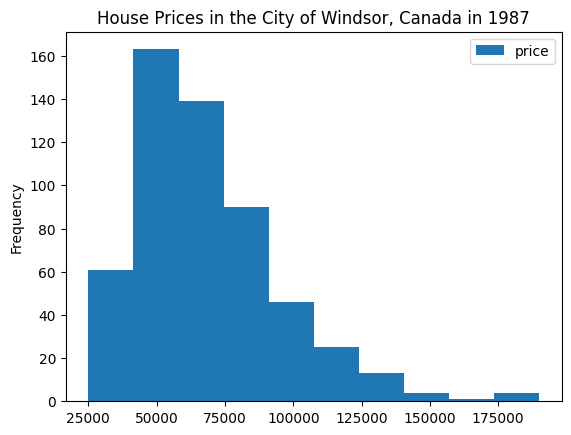

In [34]:
rawdata_data[["price"]].plot.hist()
plt.title("House Prices in the City of Windsor, Canada in 1987")

We observed a bimodal distribution for housing prices, with the majority falling within the range of approximately $50,000 to $85,000.

Text(0.5, 1.0, 'The square footage of the houses sold was recorded.')

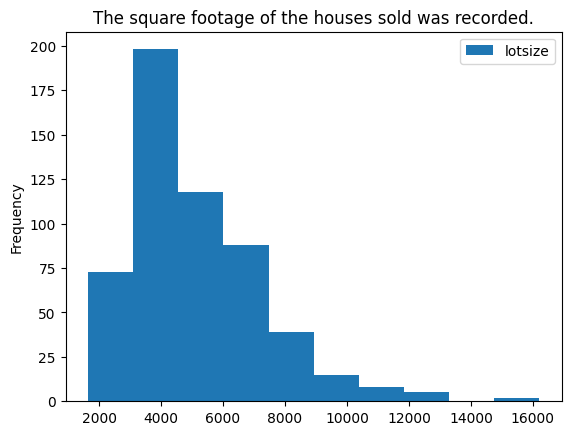

In [35]:
rawdata_data[["lotsize"]].plot.hist()
plt.title("The square footage of the houses sold was recorded.")


we observed a unimodal distribution and the data indicates that houses with 4,000 square feet were the most frequently sold at that particular time.

Text(0.5, 1.0, 'Which bedroom configurations were the most commonly sold houses')

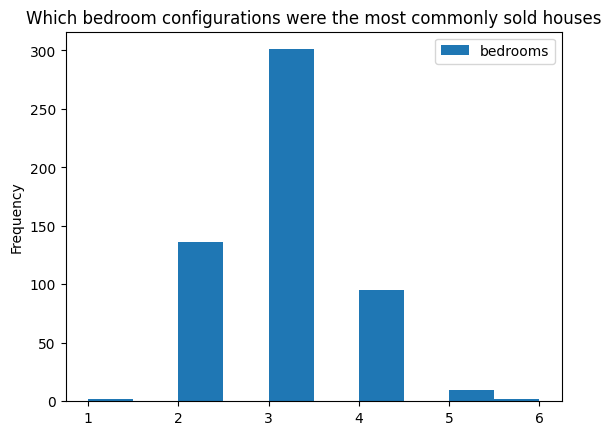

In [37]:
rawdata_data[["bedrooms"]].plot.hist()
plt.title("Which bedroom configurations were the most commonly sold houses")

we observed a normal distribution and also it is evident that 3-bedroom houses are more popular or preferred.

<Axes: title={'center': 'price'}, xlabel='driveway'>

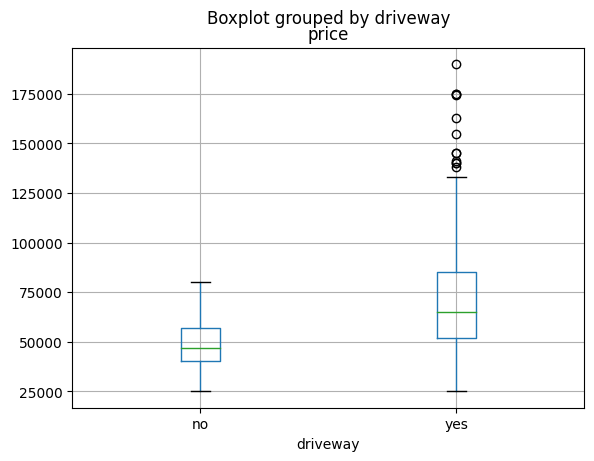

In [38]:
rawdata_data.boxplot(column=["price"], by="driveway")

The observation reveals a positive correlation between higher house prices and the presence of driveways, indicating that houses with driveways tend to command higher prices.

<Axes: title={'center': 'price'}, xlabel='aircon'>

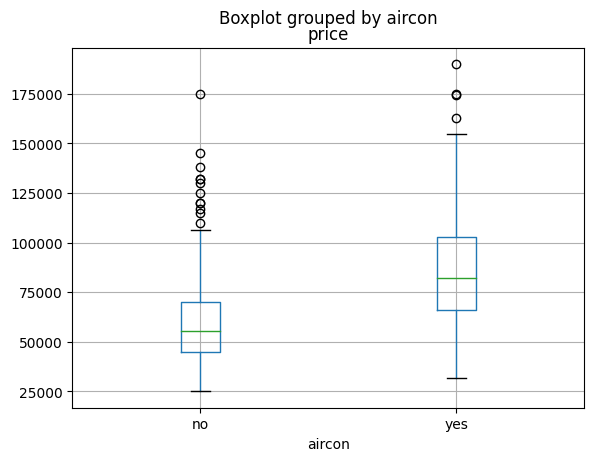

In [39]:
rawdata_data.boxplot(column=["price"], by="aircon")

Text(0.5, 1.0, 'Relation between variables')

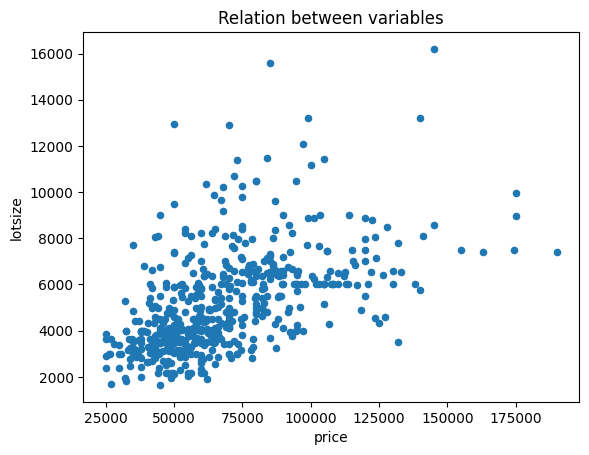

In [44]:
rawdata_data.plot.scatter(x = "price" , y="lotsize")
plt.title("Relation between variables")

lotsize and price are mostly positively correlated but We notice scattered data points that appear irregular or inconsistent in certain areas.Prices usually go up when the lot size is up to 8,000 square feet, but for houses bigger than 9,500 square feet, there is not a clear pattern.

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='lotsize', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='stories', ylabel='price'>,
        <Axes: xlabel='garage', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='lotsize'>,
        <Axes: xlabel='lotsize', ylabel='lotsize'>,
        <Axes: xlabel='bedrooms', ylabel='lotsize'>,
        <Axes: xlabel='bathrooms', ylabel='lotsize'>,
        <Axes: xlabel='stories', ylabel='lotsize'>,
        <Axes: xlabel='garage', ylabel='lotsize'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='lotsize', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bedrooms'>,
        <Axes: xlabel='stories', ylabel='bedrooms'>,
        <Axes: xlabel='garage', ylabel='bedrooms'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: 

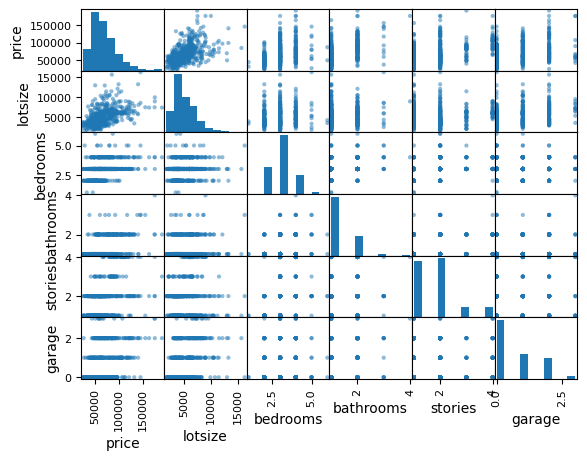

In [45]:
pd.plotting.scatter_matrix(rawdata_data[['price', 'lotsize', 'bedrooms','bathrooms','stories','garage']])

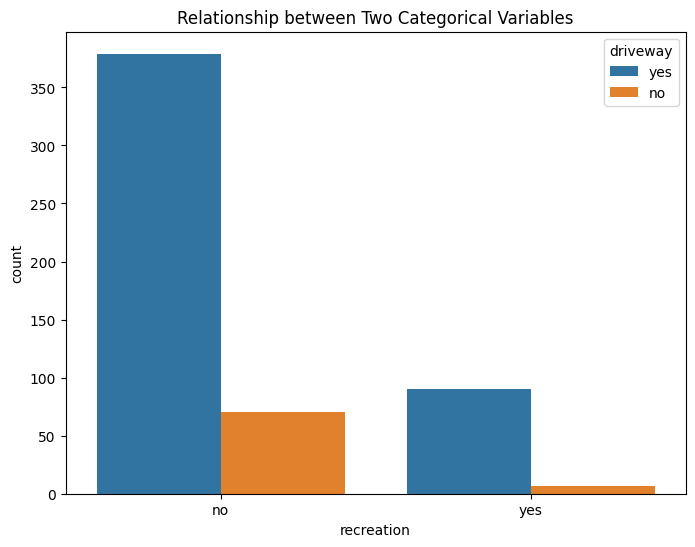

In [51]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='recreation', hue='driveway', data=rawdata_data)
plt.title("Relationship between Two Categorical Variables")
plt.show()

we observed that most of the house have a recreational rooms

Text(0.5, 1.0, 'relationship between garage and price')

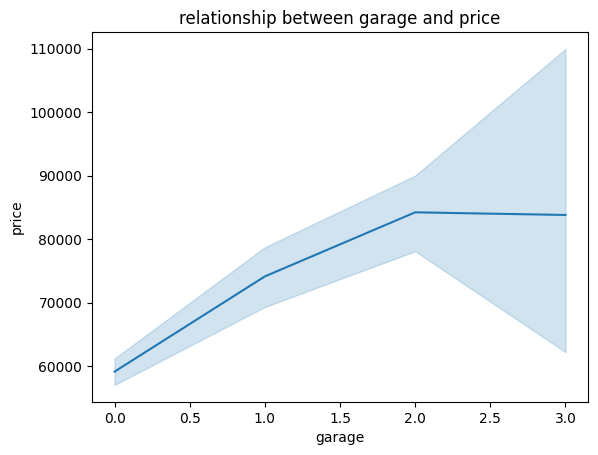

In [52]:
sns.lineplot(data=rawdata_data, x='garage', y='price')
plt.title("relationship between garage and price")

we observed from the above graph that the houses with two bathrooms were sold at a higher price.

Text(0.5, 1.0, 'Relation between bedrooms vs price')

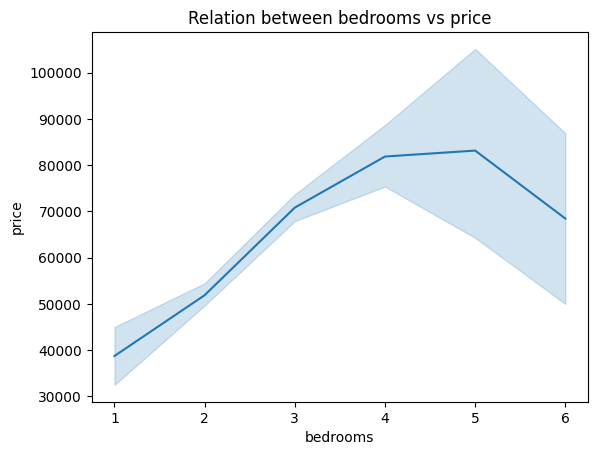

In [53]:
sns.lineplot(data=rawdata_data, x='bedrooms', y='price')
plt.title("Relation between bedrooms vs price")

we observed from the above graph that the houses with four and five bedrooms are being sold at higher prices.

Conclusion: From the EDA analysis we can conlude that in 1987, the presence of a driveway was the main thing that affected how much houses cost in Canada. Houses with driveways were in high demand and had higher prices. Other things like if there was a garage, how big the lot was, and how many bedrooms there were also made a big difference in the price of houses. This shows that people buying houses at that time cared a lot about certain features, which were really important in the housing market back then.